In [1]:
# 1 #STEPS of preprocessing of data
# 2 step:1] Import neccessary library
# 3 step: 2] Read Dataset
# 4 step: 3] sanity check of data
# 5 step:4] Exploratory Data Analysis (EDA)
# 6 step: 5] -Missing Value treatments
# 7 step: 6] Outliers treatments
# 8 step: 7]- duplicates & garbage value treatments
# 9 step:8] Normalization
# 10 step:9]- Encoding of data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/StudentMarkPrediction_hours/StudentMarksDataset.csv')

In [6]:
df.head()

,StudyHrs,Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   StudyHrs  195 non-null    float64
 1   Marks     200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.shape

(200, 2)

In [9]:
df.isnull().sum()

,0
StudyHrs,5
Marks,0


In [10]:
df['StudyHrs'].fillna(df['StudyHrs'].mean(), inplace=True)

<ipython-input-10-49e2e8c18f14>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StudyHrs'].fillna(df['StudyHrs'].mean(), inplace=True)


In [11]:
df.isnull().sum()

,0
StudyHrs,0
Marks,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,StudyHrs,Marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [14]:
df.nunique()

,0
StudyHrs,145
Marks,192


In [15]:
df.describe()

,StudyHrs,Marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


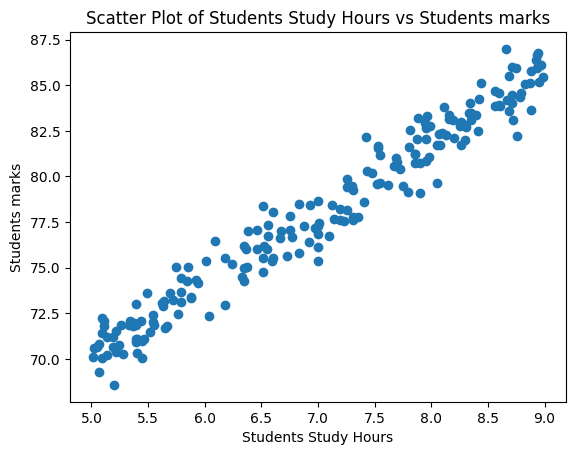

In [16]:
plt.scatter(x =df.StudyHrs, y = df.Marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

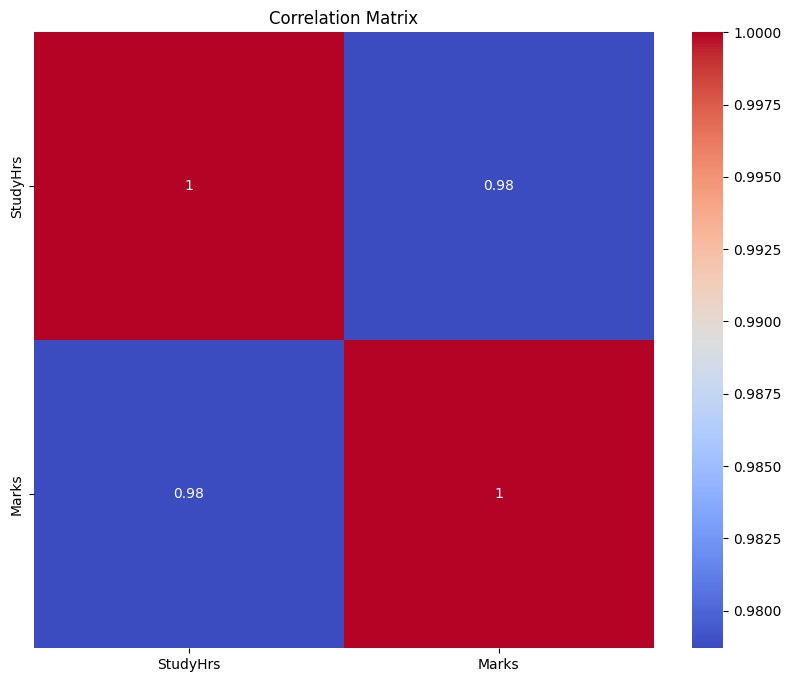

In [17]:
df_corr = df.corr()                           #myself giving heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')    #check seaborn off. doc, annot=True -> values no, mela varum
plt.title('Correlation Matrix')
plt.show()

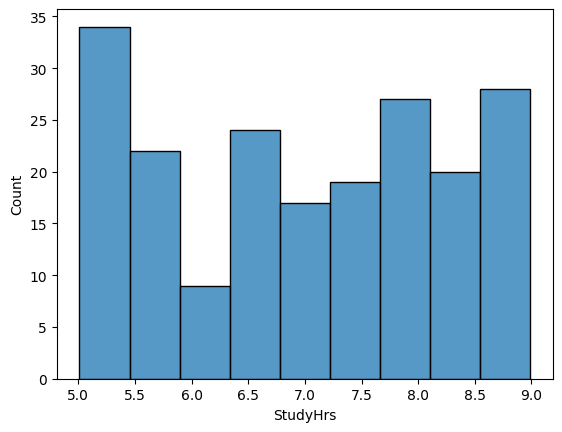

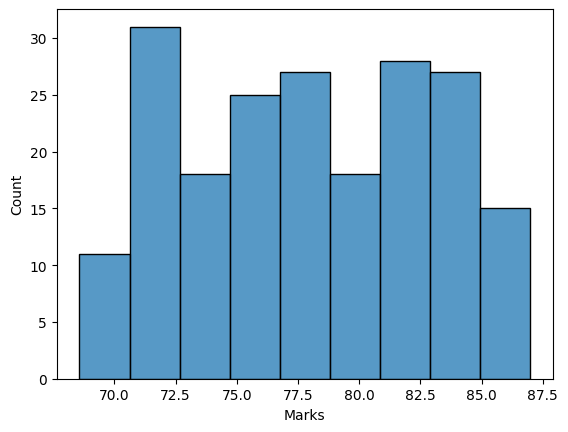

In [18]:
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

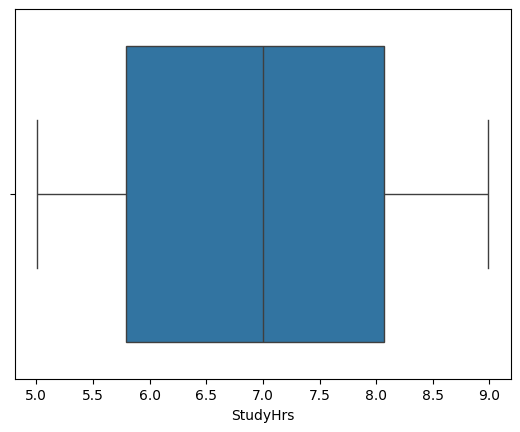

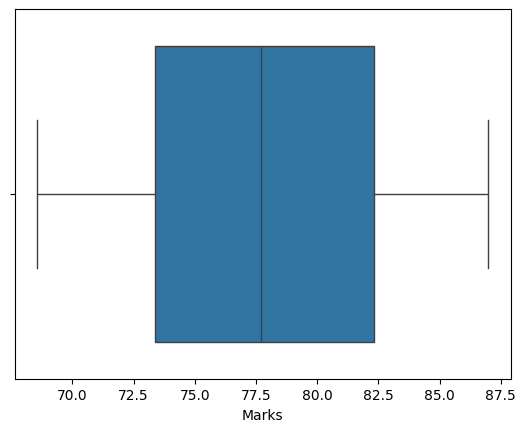

In [19]:
#Boxplot to identify the outliers
#using numerical cols
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [20]:
#finding outlier using z-score
import scipy.stats as stas
z_scores = stas.zscore(df)     #standard deviation sa ithu find panidu
threshold = 3
print("Size before removing outliers",df.shape)
outlier_df = df[(z_scores>threshold).any(axis=1)]
df = df[(z_scores<=threshold).all(axis=1)]
print("Size after removing outliers",df.shape)

Size before removing outliers (200, 2)
Size after removing outliers (200, 2)


In [36]:
X = df.drop('Marks',axis=1)
y = df['Marks']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(200, 1) (150, 1) (50, 1)


In [38]:
#feature preprocessing -> Normalisation or standardization
#standardization -> giving same unit scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(df)

df_scaled = pd.DataFrame(scalar.transform(df), columns=df.columns)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [43]:
y_pred_train =model.predict(X_train)
print("Mean squared error:",mean_squared_error(y_train,y_pred_train))
print('\n')
print("Mean Absolute error:",mean_absolute_error(y_train,y_pred_train))
print('\n')
print("R-squared:",r2_score(y_train,y_pred_train))
print('\n')

Mean squared error: 0.9650542426371741


Mean Absolute error: 0.775885636447092


R-squared: 0.9590584497660917




In [44]:
y_pred =model.predict(X_test)
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print('\n')
print("Mean Absolute error:",mean_absolute_error(y_test,y_pred))
print('\n')
print("R-squared:",r2_score(y_test,y_pred))
print('\n')

Mean squared error: 1.1855397017712952


Mean Absolute error: 0.9044783199278049


R-squared: 0.9537512885024679




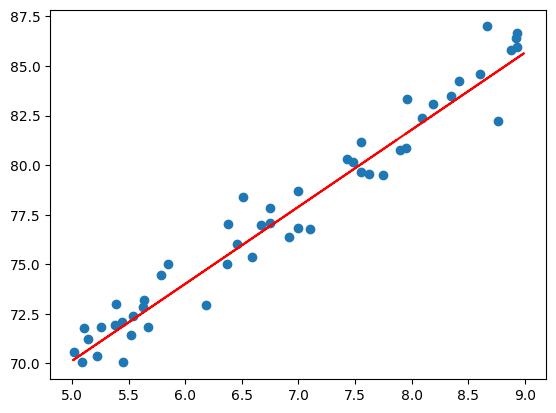

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_train, model.predict(X_train), color = "r")

In [46]:
#Marks Prediction based upon study hours
model.predict([[9]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.67611007137228

In [47]:
with open('StudentMarkPrediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)